In [129]:
#Importing the required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#Setting some preliminary options to make the analysis easier
pd.set_option('display.precision', 2)
plt.rcParams['figure.figsize'] = (18,15) 
%matplotlib inline

In [130]:
#Reading the dataset into a Dataframe object
df = pd.read_csv('Boombikes.csv')

df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


In [131]:
#Comverting the dteday column to a datetime object and extracting the day of the month from it

df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day

In [132]:
#Verifying the values
df.head(25)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985,1
1,2,2018-02-01,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801,1
2,3,2018-03-01,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349,1
3,4,2018-04-01,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562,1
4,5,2018-05-01,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600,1
5,6,2018-06-01,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606,1
6,7,2018-07-01,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510,1
7,8,2018-08-01,1,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959,1
8,9,2018-09-01,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822,1
9,10,2018-10-01,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321,1


In [133]:
#Checking the number of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  day         730 non-null  

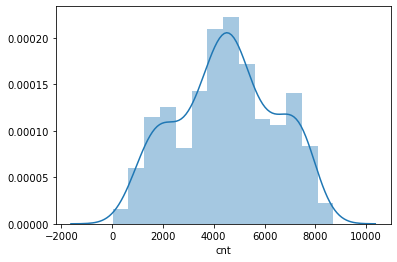

In [134]:
#Plotting the distribution of count, the target variable 
sns.distplot(df['cnt'])

In [135]:
#Making a subset of the time related metrics to see the relationship between them and the target variable
days = ['day', 'yr', 'mnth','holiday', 'weekday', 'workingday', 'cnt' ]
df[days].describe()

,day,yr,mnth,holiday,weekday,workingday,cnt
count,730.00,730.0,730.00,730.00,730.00,730.00,730.00
mean,15.72,0.5,6.53,0.03,3.00,0.68,4508.01
std,8.80,0.5,3.45,0.17,2.01,0.47,1936.01
min,1.00,0.0,1.00,0.00,0.00,0.00,22.00
25%,8.00,0.0,4.00,0.00,1.00,0.00,3169.75
50%,16.00,0.5,7.00,0.00,3.00,1.00,4548.50
75%,23.00,1.0,10.00,0.00,5.00,1.00,5966.00
max,31.00,1.0,12.00,1.00,6.00,1.00,8714.00


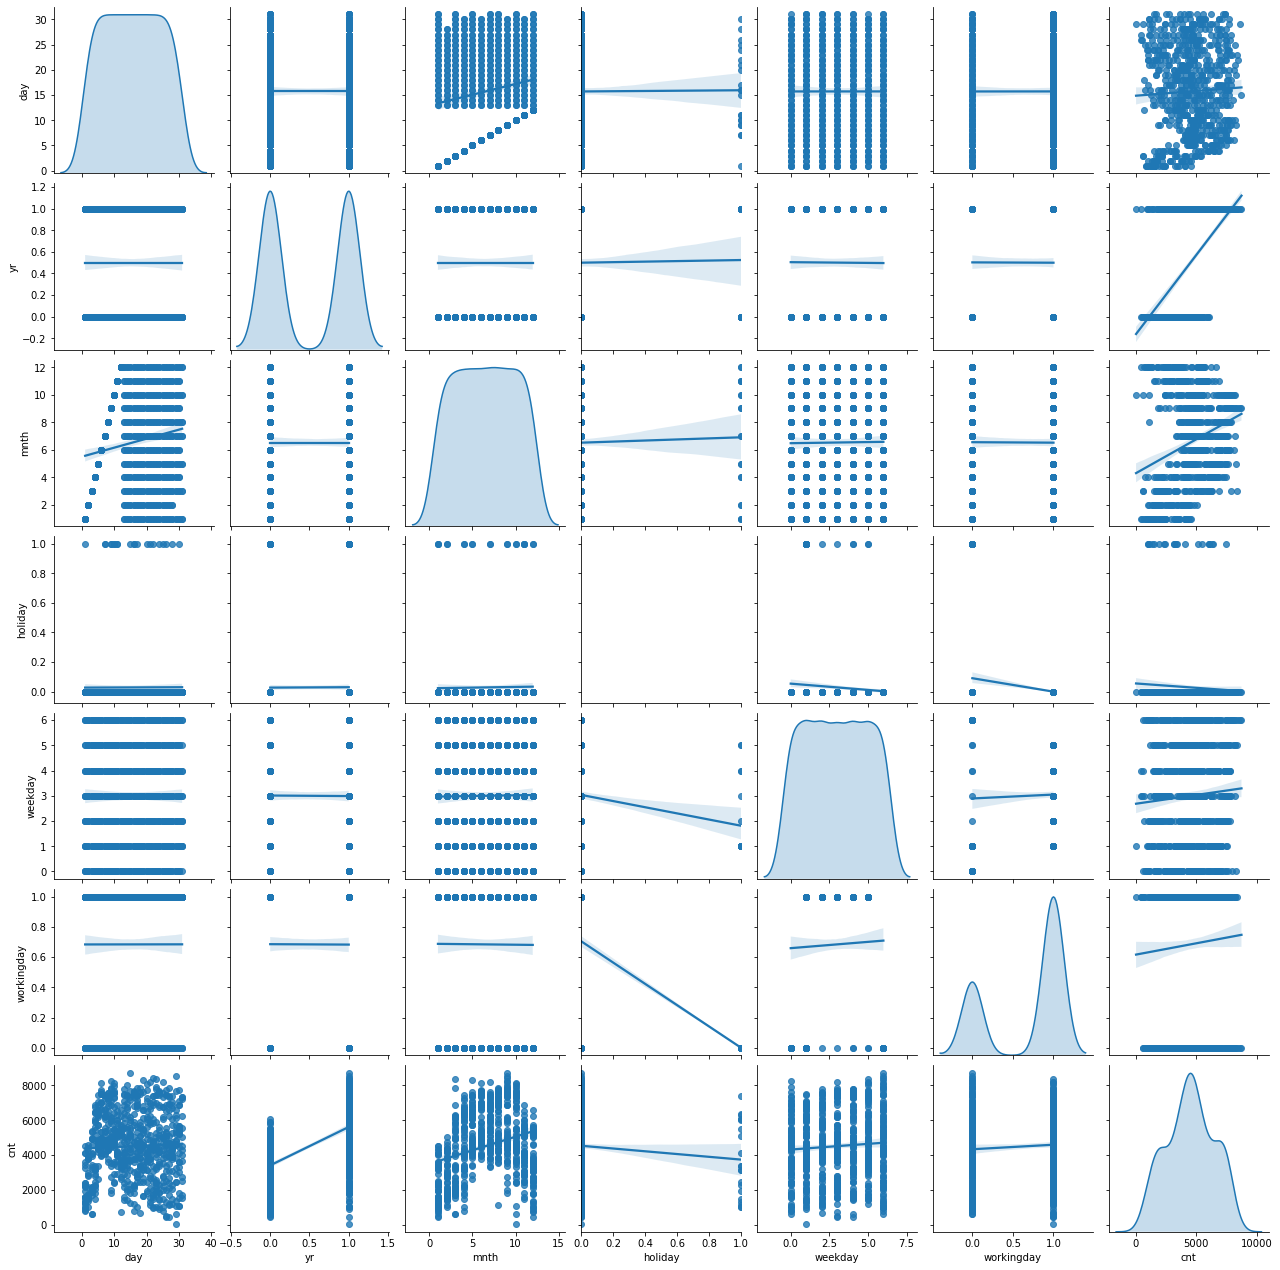

In [136]:
#Plotting the pairplot for the time related metrics and the target variable to see the relationships
sns.pairplot(df[days], kind = 'reg', diag_kind = 'kde')
plt.show()

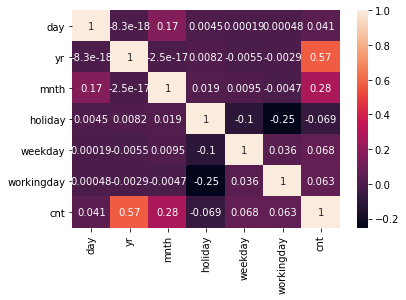

In [137]:
#Seeing the correlation values of the time related variables and demand
sns.heatmap(df[days].corr(), annot = True)
plt.show()

In [138]:
#Making a subset of weather parameters 
weather_params = ['weathersit', 'temp', 'atemp', 'windspeed', 'hum', 'cnt', 'season']
df[weather_params].describe()

,weathersit,temp,atemp,windspeed,hum,cnt,season
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,1.39,20.32,23.73,12.76,62.77,4508.01,2.50
std,0.54,7.51,8.15,5.20,14.24,1936.01,1.11
min,1.00,2.42,3.95,1.50,0.00,22.00,1.00
25%,1.00,13.81,16.89,9.04,52.00,3169.75,2.00
50%,1.00,20.47,24.37,12.13,62.62,4548.50,3.00
75%,2.00,26.88,30.45,15.63,72.99,5966.00,3.00
max,3.00,35.33,42.04,34.00,97.25,8714.00,4.00


<Figure size 720x576 with 0 Axes>

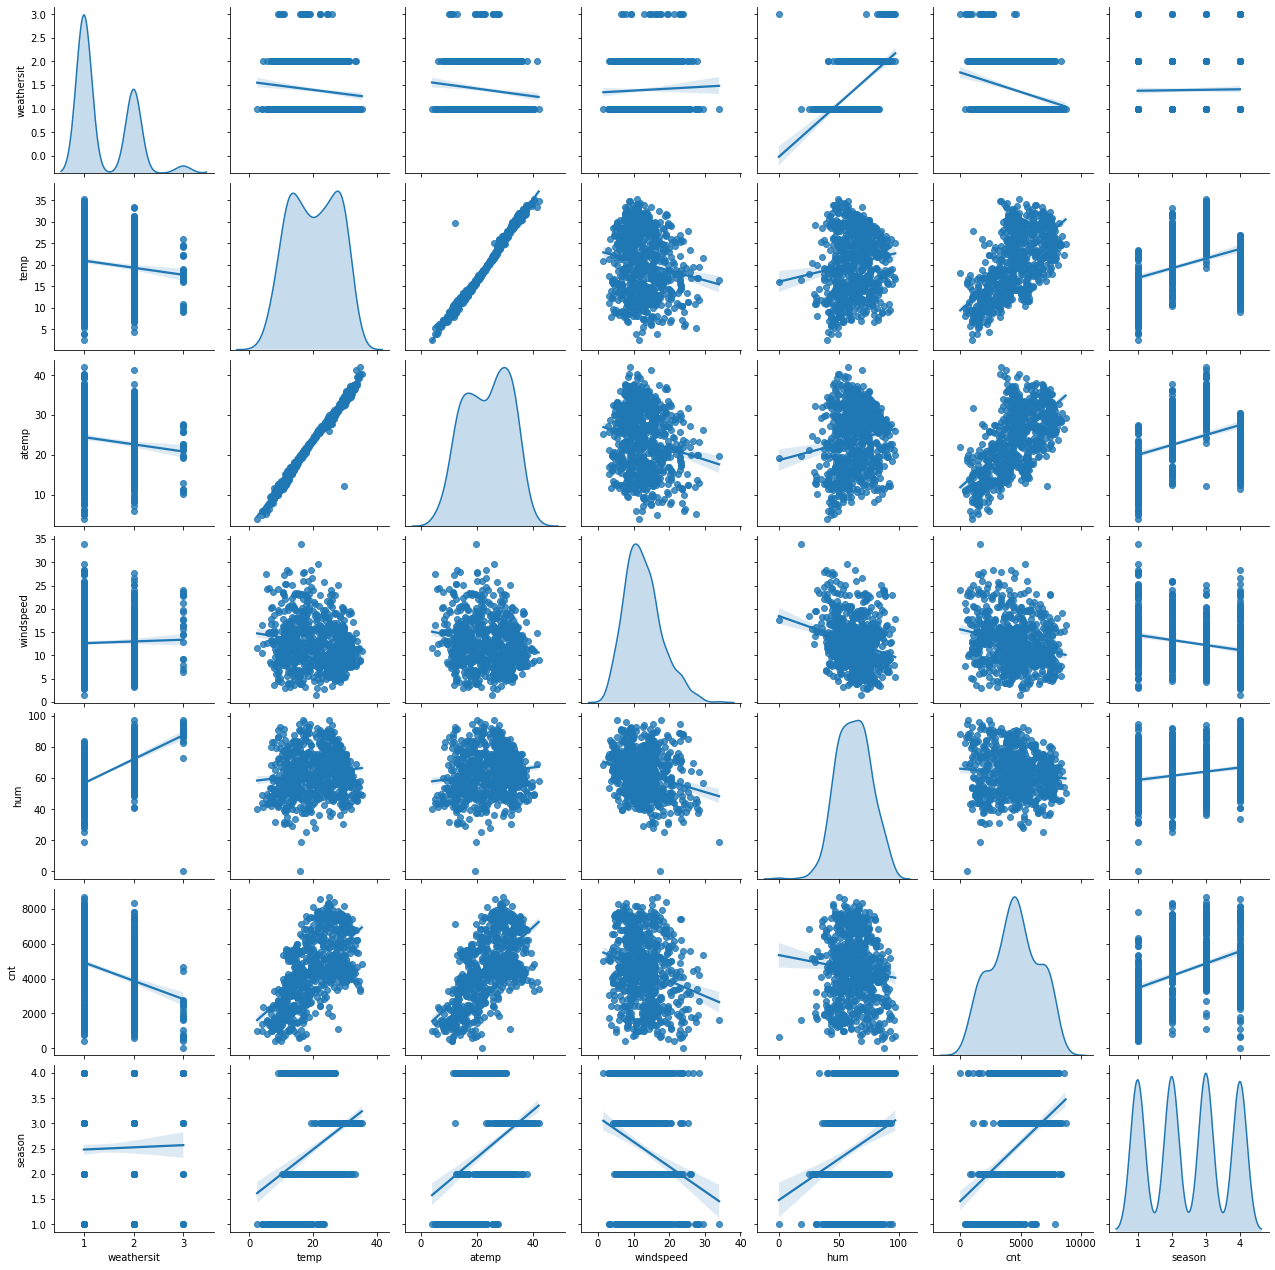

In [139]:
#Plotting a pairplot between the weather parameters and count to glean the relationships 
plt.figure(figsize = (10,8))
sns.pairplot(kind = 'reg', data = df[weather_params], diag_kind = 'kde')

In [140]:
#Taking the value counts for the weather situation values
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

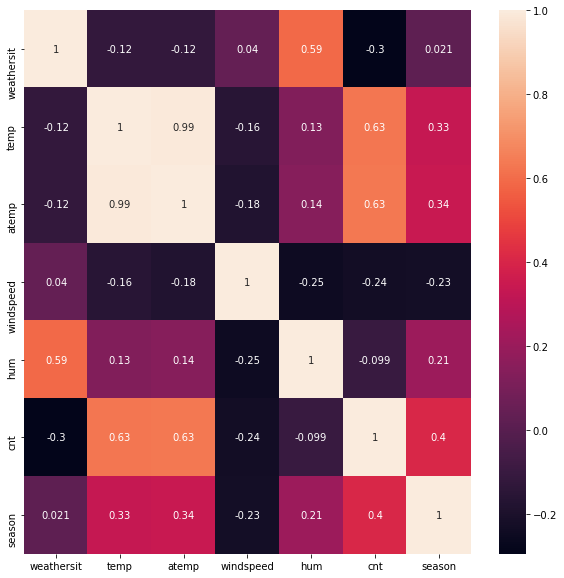

In [141]:
#Plotting a heatmap between the weather parameters and the count variable to see the correlation values
plt.figure(figsize = (10,10))
sns.heatmap(df[weather_params].corr(), annot = True)

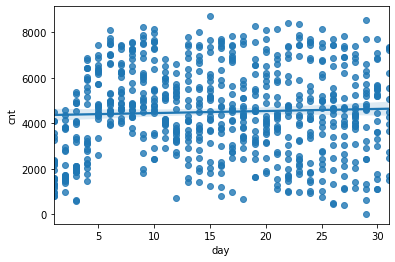

In [142]:

sns.regplot(x = df['day'], y = df['cnt'])

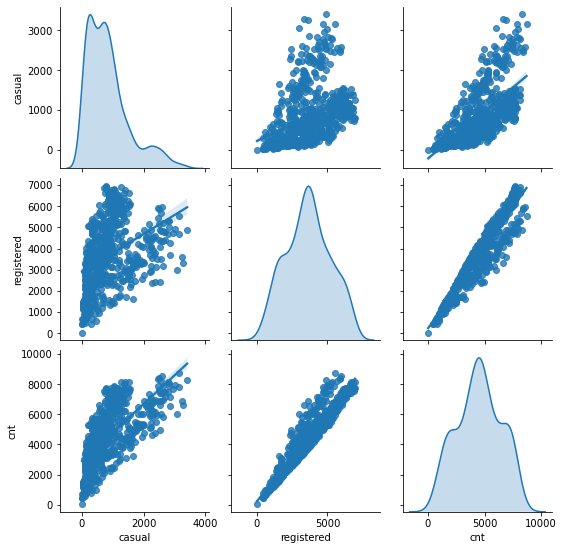

In [143]:
#Making a subset of the no of rides per day variables, including the count variable
no_of_rides = ['casual', 'registered', 'cnt']

sns.pairplot(df[no_of_rides], kind = 'reg', diag_kind = 'kde')
plt.show()

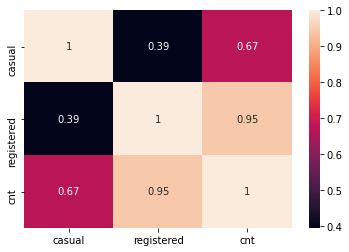

In [144]:
#Plotting a heatmap to see the correlation values
sns.heatmap(df[no_of_rides].corr(), annot = True)
#Decided to retain the casual and registered features since the correlation values are different

In [145]:
#Dropping some variables which won't be required for the analysis

df = df.drop(columns = ['dteday', 'temp', 'instant', 'registered', 'casual'])

# Here I am dropping dteday because a datetime object won't be required for regression analysis and temp because temp
# and atemp are almost the same variables. Atemp makes more sense to retain since from a rider's perspective, since it makes 
# sense to ride to a place based on the feeling temperature and not the absolute temperature. 

#Splitting the data into training and testing sets 
train_set, test_set = train_test_split(df, train_size = 0.72, random_state = 46)

train_set.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day
342,4,0,12,0,5,1,1,15.88,69.58,5.54,3620,12
223,3,0,8,0,5,1,1,32.70,41.50,8.42,4905,8
698,4,1,11,0,5,1,1,16.19,64.96,3.92,5668,30
398,1,1,2,0,5,1,1,15.47,52.67,11.96,4151,2
268,4,0,9,0,1,1,2,29.45,84.83,7.42,4630,26
207,3,0,7,0,3,1,1,34.53,40.29,12.29,4656,27
144,2,0,5,0,3,1,1,30.78,69.62,10.33,4978,25
478,2,1,4,0,2,1,1,20.26,45.42,16.71,5633,24
388,1,1,1,0,2,1,1,17.46,83.58,8.29,4339,24
360,1,0,12,0,2,1,2,16.38,76.25,12.63,1162,27


In [146]:
#Fitting and transforming the data to bring them to a single scale
scaler = StandardScaler()
scaler_cols = ['season', 'mnth', 'weekday', 'weathersit', 'day', 'atemp', 'hum', 'windspeed', 'cnt']

train_set[scaler_cols] = scaler.fit_transform(train_set[scaler_cols])

train_set.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day
342,1.38,0,1.61,0,1.00,1,-0.73,-0.96,0.47,-1.40,-0.45,-0.46
223,0.47,0,0.44,0,1.00,1,-0.73,1.07,-1.48,-0.84,0.21,-0.91
698,1.38,1,1.31,0,1.00,1,-0.73,-0.92,0.15,-1.71,0.60,1.58
398,-1.34,1,-1.31,0,1.00,1,-0.73,-1.01,-0.70,-0.16,-0.18,-1.59
268,1.38,0,0.73,0,-1.01,1,1.12,0.68,1.53,-1.04,0.07,1.13


In [147]:
y_train = train_set.pop('cnt')

In [148]:
#Creating feature varables and adding a constant to use it with the statsmodel package
X_train = train_set
X_train_sm = sm.add_constant(X_train)

#Building the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          4.42e-172
Time:                        02:45:44   Log-Likelihood:                -320.62
No. Observations:                 525   AIC:                             665.2
Df Residuals:                     513   BIC:                             716.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6192      0.043    -14.325      0.000      -0.704      -0.534
season         0.3200      0.036      9.010      0.000       0.250       0.390
yr             1.0713      0.040     27.048      0.000       0.993       1.149
mnth          -0.0858      0.034     -2.503      0.013      -0.153      -0.018
holiday       -0.1377      0.128     -1.076      0.283      -0.389       0.114
weekday        0.0719      0.020      3.588      0.000       0.033       0.111
workingday     0.1178      0.044      2.648      0.008       0.030       0.205
weathersit    -0.1729      0.026     -6.692      0.000      -0.224      -0.122
atemp          0.4820      0.022     21.926      0.000       0.439       0.525
hum           -0.0688      0.027     -2.584      0.010      -0.121      -0.017
windspeed     -0.0900      0.021     -4.280      0.000      -0.131      -0.049
day           -0.0317      0.020     -1.572      0.116      -0.071       0.008
==============================================================================
Omnibus:                       38.355   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.313
Skew:                          -0.540   Prob(JB):                     3.59e-13
Kurtosis:                       4.206   Cond. No.                         9.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Calculating the variance inflation factor to spot multicollinearity
vif = pd.DataFrame()
vif['Column'] = X_train.columns 
vif['Vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif.sort_values(by = 'Vif', ascending = False)


,Column,Vif
0,season,3.26
2,mnth,3.04
8,hum,1.83
6,weathersit,1.72
1,yr,1.54
5,workingday,1.52
7,atemp,1.24
9,windspeed,1.14
3,holiday,1.05
10,day,1.05


In [150]:
#Dropping the feature variable holiday based on p-value
X = train_set.drop(columns = ['holiday'])
X_train_sm = sm.add_constant(X)

#Rebuilding the model with the remaining feature variables
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     206.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.32e-173
Time:                        02:45:44   Log-Likelihood:                -321.22
No. Observations:                 525   AIC:                             664.4
Df Residuals:                     514   BIC:                             711.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6313      0.042    -15.126      0.000      -0.713      -0.549
season         0.3232      0.035      9.131      0.000       0.254       0.393
yr             1.0718      0.040     27.060      0.000       0.994       1.150
mnth          -0.0887      0.034     -2.596      0.010      -0.156      -0.022
weekday        0.0748      0.020      3.767      0.000       0.036       0.114
workingday     0.1295      0.043      3.002      0.003       0.045       0.214
weathersit    -0.1733      0.026     -6.705      0.000      -0.224      -0.122
atemp          0.4821      0.022     21.929      0.000       0.439       0.525
hum           -0.0688      0.027     -2.582      0.010      -0.121      -0.016
windspeed     -0.0896      0.021     -4.263      0.000      -0.131      -0.048
day           -0.0325      0.020     -1.612      0.108      -0.072       0.007
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.516
Skew:                          -0.532   Prob(JB):                     8.81e-13
Kurtosis:                       4.186   Cond. No.                         4.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
#Checking the vif values once again
vif = pd.DataFrame()
vif['Column'] = X.columns 
vif['Vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by = 'Vif', ascending = False)


,Column,Vif
0,season,3.23
2,mnth,3.02
7,hum,1.83
5,weathersit,1.72
1,yr,1.51
4,workingday,1.51
6,atemp,1.24
8,windspeed,1.14
9,day,1.05
3,weekday,1.02


In [152]:
#Dropping the variable based on the p-value
X = train_set.drop(columns = ['holiday','day'])
X_train_sm = sm.add_constant(X)

#Building the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.24e-173
Time:                        02:45:44   Log-Likelihood:                -322.54
No. Observations:                 525   AIC:                             665.1
Df Residuals:                     515   BIC:                             707.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6313      0.042    -15.102      0.000      -0.713      -0.549
season         0.3227      0.035      9.105      0.000       0.253       0.392
yr             1.0710      0.040     26.999      0.000       0.993       1.149
mnth          -0.0937      0.034     -2.748      0.006      -0.161      -0.027
weekday        0.0749      0.020      3.767      0.000       0.036       0.114
workingday     0.1301      0.043      3.011      0.003       0.045       0.215
weathersit    -0.1698      0.026     -6.583      0.000      -0.220      -0.119
atemp          0.4809      0.022     21.852      0.000       0.438       0.524
hum           -0.0722      0.027     -2.715      0.007      -0.124      -0.020
windspeed     -0.0905      0.021     -4.298      0.000      -0.132      -0.049
==============================================================================
Omnibus:                       39.427   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.225
Skew:                          -0.550   Prob(JB):                     1.38e-13
Kurtosis:                       4.224   Cond. No.                         4.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
#Checking the VIF values yet again
vif = pd.DataFrame()
vif['Column'] = X.columns 
vif['Vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by = 'Vif', ascending = False)

,Column,Vif
0,season,3.23
2,mnth,2.99
7,hum,1.82
5,weathersit,1.71
1,yr,1.51
4,workingday,1.51
6,atemp,1.24
8,windspeed,1.14
3,weekday,1.02


In [154]:
#Dropping the variable based on the p-value and coefficient
X = train_set.drop(columns = ['holiday','day','mnth'])
X_train_sm = sm.add_constant(X)

#Building the model
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     253.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          3.17e-173
Time:                        02:45:44   Log-Likelihood:                -326.36
No. Observations:                 525   AIC:                             670.7
Df Residuals:                     516   BIC:                             709.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6331      0.042    -15.053      0.000      -0.716      -0.550
season         0.2453      0.022     11.345      0.000       0.203       0.288
yr             1.0705      0.040     26.816      0.000       0.992       1.149
weekday        0.0748      0.020      3.739      0.000       0.035       0.114
workingday     0.1331      0.043      3.063      0.002       0.048       0.218
weathersit    -0.1702      0.026     -6.560      0.000      -0.221      -0.119
atemp          0.4887      0.022     22.259      0.000       0.446       0.532
hum           -0.0780      0.027     -2.923      0.004      -0.130      -0.026
windspeed     -0.0898      0.021     -4.239      0.000      -0.131      -0.048
==============================================================================
Omnibus:                       41.358   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.944
Skew:                          -0.573   Prob(JB):                     3.54e-14
Kurtosis:                       4.233   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#Dropping the variable based on the p-value & coefficient
X = train_set.drop(columns = ['holiday','day', 'weekday'])
X_train_sm = sm.add_constant(X)

#Building the model
lr = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr.fit()

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          8.14e-172
Time:                        02:45:44   Log-Likelihood:                -329.67
No. Observations:                 525   AIC:                             677.3
Df Residuals:                     516   BIC:                             715.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6356      0.042    -15.021      0.000      -0.719      -0.552
season         0.3253      0.036      9.063      0.000       0.255       0.396
yr             1.0692      0.040     26.617      0.000       0.990       1.148
mnth          -0.0935      0.035     -2.708      0.007      -0.161      -0.026
workingday     0.1376      0.044      3.149      0.002       0.052       0.223
weathersit    -0.1616      0.026     -6.212      0.000      -0.213      -0.111
atemp          0.4803      0.022     21.551      0.000       0.436       0.524
hum           -0.0839      0.027     -3.133      0.002      -0.136      -0.031
windspeed     -0.0930      0.021     -4.364      0.000      -0.135      -0.051
==============================================================================
Omnibus:                       33.398   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.963
Skew:                          -0.489   Prob(JB):                     2.33e-11
Kurtosis:                       4.132   Cond. No.                         4.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The two models, lr_model_1 and lr_model_2 are variations of the original model with 1 variable removed from the original model, each. 

#### After removing the variables, by looking at the AIC and BIC values, it is evident that the original model with 9 feature variables performs the best despite having one extra feature variable than the other 2. 

#### This suggests that we've reached an endpoint for manually eliminating feature variables.

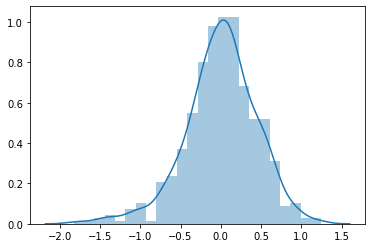

In [157]:
#Conducting the residual analysis by plotting the distribution of the difference in error terms between 
# the actual values and predicted values
X = train_set.drop(columns = ['holiday','day'])
X_train_sm = sm.add_constant(X)

y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

sns.distplot(res)

As we can see here, the error terms are centered around zero and have a fairly normal distribution. This conveys the fact that the dataset in suitable for the use of a linear regression model and the predictions made by the model would be fairly accurate. 

In [158]:
#Scaling the numeric values in the test set using the standard scaler object that 
# was previously created and preparing the data for evaluation of the model
test_set[scaler_cols] = scaler.transform(test_set[scaler_cols])

test_set.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day
count,205.00,205.00,205.00,205.00,2.05e+02,205.00,2.05e+02,205.00,2.05e+02,2.05e+02,205.00,205.00
mean,0.07,0.49,0.04,0.03,-1.86e-02,0.65,1.55e-03,-0.05,-3.20e-03,-4.69e-03,0.02,-0.12
std,1.03,0.50,1.02,0.18,1.03e+00,0.48,1.03e+00,0.94,9.63e-01,1.02e+00,0.97,0.98
min,-1.34,0.00,-1.60,0.00,-1.51e+00,0.00,-7.29e-01,-2.28,-2.35e+00,-1.92e+00,-2.29,-1.70
25%,-0.43,0.00,-1.02,0.00,-1.01e+00,0.00,-7.29e-01,-0.77,-6.19e-01,-7.86e-01,-0.59,-0.91
50%,0.47,0.00,0.15,0.00,-3.83e-03,1.00,-7.29e-01,-0.06,2.12e-02,-1.41e-01,0.08,-0.12
75%,1.38,1.00,1.02,0.00,1.00e+00,1.00,1.12e+00,0.76,6.41e-01,5.69e-01,0.67,0.79
max,1.38,1.00,1.61,1.00,1.50e+00,1.00,2.97e+00,2.20,2.40e+00,2.91e+00,2.16,1.69


In [159]:
#Extracting the y true values from the test dataset
y_test = test_set.pop('cnt')

In [160]:
#preparing the feature dataframe for evaluation
x_test = test_set
X_test_sm = sm.add_constant(x_test)

X_test_sm.describe()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,day
count,205.0,205.00,205.00,205.00,205.00,2.05e+02,205.00,2.05e+02,205.00,2.05e+02,2.05e+02,205.00
mean,1.0,0.07,0.49,0.04,0.03,-1.86e-02,0.65,1.55e-03,-0.05,-3.20e-03,-4.69e-03,-0.12
std,0.0,1.03,0.50,1.02,0.18,1.03e+00,0.48,1.03e+00,0.94,9.63e-01,1.02e+00,0.98
min,1.0,-1.34,0.00,-1.60,0.00,-1.51e+00,0.00,-7.29e-01,-2.28,-2.35e+00,-1.92e+00,-1.70
25%,1.0,-0.43,0.00,-1.02,0.00,-1.01e+00,0.00,-7.29e-01,-0.77,-6.19e-01,-7.86e-01,-0.91
50%,1.0,0.47,0.00,0.15,0.00,-3.83e-03,1.00,-7.29e-01,-0.06,2.12e-02,-1.41e-01,-0.12
75%,1.0,1.38,1.00,1.02,0.00,1.00e+00,1.00,1.12e+00,0.76,6.41e-01,5.69e-01,0.79
max,1.0,1.38,1.00,1.61,1.00,1.50e+00,1.00,2.97e+00,2.20,2.40e+00,2.91e+00,1.69


In [161]:
# Dropping unnecessary feature columns 
X_test_sm.drop(columns = ['holiday', 'day'], inplace = True)

In [162]:
#Verifying the values
X_test_sm.head()

,const,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed
362,1.0,-1.34,0,1.61,4.99e-01,1,-0.73,-1.29,-0.37,-0.92
458,1.0,-0.43,1,-0.73,-3.83e-03,1,-0.73,0.34,-1.10,-0.12
36,1.0,-1.34,0,-1.31,-1.51e+00,0,-0.73,-1.12,-0.41,-0.63
249,1.0,0.47,0,0.73,-3.83e-03,1,2.97,0.41,2.01,-1.21
300,1.0,1.38,0,1.02,1.00e+00,1,1.12,-0.95,-0.29,0.50


In [163]:
#Evaluating the model
y_test_pred = lr_model.predict(X_test_sm)

In [164]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7908125402013589

After building the entire, by selecting the features manully, the adjusted R-squared value of the model turns out to be 0.796 and the R-squared value of the evaluation set comes upto 0.790. Since the model doesn't have a major differene between the R-squared value and the adjusted R-squared value, there isn't a necessity to remove more variables from the model, assuming this model is built for predictions and not interpretability. 


This model is giving satisfactory results. To explore the possibility of a better model, let's try the automated feature selection using the RFE techique. 

In [165]:
#Reading the source dataset in another dataframe object 

df_auto = pd.read_csv('Boombikes.csv')

df_auto.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [166]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [167]:
df_auto['dteday'] = pd.to_datetime(df_auto['dteday'])
df_auto['day'] = df_auto['dteday'].dt.day

#Dropping the count of casual and the registered users variables since they are not exactly features and 
# the other 2 features won't be very useful since we have derived metrics instead of dteday

df_auto.drop(['casual', 'registered', 'instant', 'dteday'], axis = 1, inplace = True)

df_auto.head(14)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985,1
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801,1
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349,1
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562,1
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600,1
5,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,1606,1
6,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,1510,1
7,1,0,1,0,6,0,2,6.76,8.11,53.58,17.88,959,1
8,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,822,1
9,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,1321,1


In [168]:
#Splitting the data into 2 sets, training set and the testing set
train_set_rfe, test_set_rfe = train_test_split(df_auto, train_size = 0.72, random_state = 73)

train_set_rfe.shape

(525, 13)

In [169]:
numericVars = ['season', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']
train_set_rfe[numericVars] = scaler.fit_transform(train_set_rfe[numericVars])

train_set_rfe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
417,-1.38,1,-1.39,0,6.58e-03,1,1,-0.58,-0.54,-0.44,0.60,0.12,0.72
466,-0.48,1,-0.80,0,5.00e-01,1,1,-0.57,-0.57,-1.17,1.33,0.45,-1.36
262,0.41,0,0.66,0,-4.87e-01,1,2,0.34,0.32,1.83,-0.70,-0.48,0.49
564,0.41,1,0.08,0,5.00e-01,1,1,1.48,1.46,-0.20,-0.30,1.08,0.37
219,0.41,0,0.37,0,-9.80e-01,1,1,1.46,1.38,-0.26,0.05,-0.12,-0.90


In [170]:
y_train_lm = train_set_rfe.pop('cnt')
X_train_lm = train_set_rfe

In [171]:
#Building another linear model with automated feature selection

lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

#Using RFE to select the top 8 variables in the 
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train_lm, y_train_lm)

In [172]:
list(zip(X_train_lm.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 2)]

In [173]:
X_cols = X_train_lm[X_train_lm.columns[rfe.support_]]
X_cols.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed
417,-1.38,1,-1.39,0,6.58e-03,1,-0.58,-0.54,-0.44,0.60
466,-0.48,1,-0.80,0,5.00e-01,1,-0.57,-0.57,-1.17,1.33
262,0.41,0,0.66,0,-4.87e-01,2,0.34,0.32,1.83,-0.70
564,0.41,1,0.08,0,5.00e-01,1,1.48,1.46,-0.20,-0.30
219,0.41,0,0.37,0,-9.80e-01,1,1.46,1.38,-0.26,0.05


In [174]:
X_train_rfe_sm = sm.add_constant(X_cols)

In [175]:
lm_rfe = sm.OLS(y_train_lm, X_train_rfe_sm)

lm_rfe_model = lm_rfe.fit()

lm_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     184.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          7.41e-163
Time:                        02:47:54   Log-Likelihood:                -345.17
No. Observations:                 525   AIC:                             712.3
Df Residuals:                     514   BIC:                             759.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1306      0.077     -1.689      0.092      -0.282       0.021
season         0.2876      0.037      7.777      0.000       0.215       0.360
yr             1.0836      0.042     26.048      0.000       1.002       1.165
mnth          -0.0702      0.036     -1.976      0.049      -0.140      -0.000
holiday       -0.3442      0.115     -3.002      0.003      -0.570      -0.119
weekday        0.0789      0.021      3.780      0.000       0.038       0.120
weathersit    -0.2942      0.053     -5.569      0.000      -0.398      -0.190
temp          -0.2813      0.259     -1.087      0.277      -0.789       0.227
atemp          0.7918      0.261      3.029      0.003       0.278       1.305
hum           -0.0929      0.030     -3.106      0.002      -0.152      -0.034
windspeed     -0.1030      0.023     -4.524      0.000      -0.148      -0.058
==============================================================================
Omnibus:                       88.361   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.122
Skew:                          -0.955   Prob(JB):                     1.14e-37
Kurtosis:                       5.032   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
VIF_rfe = pd.DataFrame()
VIF_rfe['features'] = X_cols.columns
VIF_rfe['vif_values'] = [variance_inflation_factor(X_cols.values, i) for i in range(X_cols.shape[1])]

VIF_rfe.sort_values(by = 'vif_values', ascending = False)

,features,vif_values
7,atemp,157.56
6,temp,155.12
0,season,3.22
2,mnth,2.97
5,weathersit,2.10
1,yr,1.97
8,hum,1.33
9,windspeed,1.19
3,holiday,1.05
4,weekday,1.02


In [177]:
# Since temp has a higher VIF value and p-value, it makes sense to remove temp value than atemp value
X_cols = X_cols.drop(columns = 'temp')

In [178]:
X_cols_sm = sm.add_constant(X_cols)

lm_rfe = sm.OLS(y_train_lm, X_cols_sm)

lm_rfe_model = lm_rfe.fit()

lm_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          9.07e-164
Time:                        02:47:54   Log-Likelihood:                -345.77
No. Observations:                 525   AIC:                             711.5
Df Residuals:                     515   BIC:                             754.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1197      0.077     -1.561      0.119      -0.270       0.031
season         0.2903      0.037      7.864      0.000       0.218       0.363
yr             1.0833      0.042     26.038      0.000       1.002       1.165
mnth          -0.0710      0.036     -1.999      0.046      -0.141      -0.001
holiday       -0.3512      0.115     -3.067      0.002      -0.576      -0.126
weekday        0.0788      0.021      3.773      0.000       0.038       0.120
weathersit    -0.3018      0.052     -5.764      0.000      -0.405      -0.199
atemp          0.5087      0.023     22.249      0.000       0.464       0.554
hum           -0.0877      0.030     -2.970      0.003      -0.146      -0.030
windspeed     -0.1074      0.022     -4.798      0.000      -0.151      -0.063
==============================================================================
Omnibus:                       80.459   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.541
Skew:                          -0.900   Prob(JB):                     1.51e-32
Kurtosis:                       4.859   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
VIF_rfe = pd.DataFrame()
VIF_rfe['features'] = X_cols.columns
VIF_rfe['vif_values'] = [variance_inflation_factor(X_cols.values, i) for i in range(X_cols.shape[1])]


VIF_rfe.sort_values(by = 'vif_values', ascending = False)

,features,vif_values
0,season,3.21
2,mnth,2.97
5,weathersit,2.10
1,yr,1.97
7,hum,1.32
6,atemp,1.18
8,windspeed,1.14
3,holiday,1.05
4,weekday,1.02


In [180]:
test_set_rfe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
549,3,1,7,1,3,0,1,32.36,36.62,53.88,9.04,7403,7
480,2,1,4,0,4,1,2,20.43,24.18,75.67,11.83,5026,26
31,1,0,2,0,2,1,2,7.88,11.73,82.96,3.57,1360,2
20,1,0,1,0,5,1,1,7.28,7.89,45.71,23.67,1543,21
401,1,1,2,0,1,1,1,11.59,14.82,62.22,10.30,3784,2


In [181]:
test_set_rfe[numericVars] = scaler.transform(test_set_rfe[numericVars])

test_set_rfe.drop(columns = ['temp','workingday', 'day'], inplace = True)

y_test_rfe = test_set_rfe.pop('cnt')
X_test_rfe = test_set_rfe

X_test_rfe.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed
549,0.41,1,0.08,1,6.58e-03,1,1.56,-0.65,-0.70
480,-0.48,1,-0.80,0,5.00e-01,2,0.02,0.93,-0.15
31,-1.38,0,-1.39,0,-4.87e-01,2,-1.52,1.45,-1.76
20,-1.38,0,-1.68,0,9.93e-01,1,-2.00,-1.24,2.14
401,-1.38,1,-1.39,0,-9.80e-01,1,-1.14,-0.04,-0.45


In [182]:
y_test_rfe.head()

549    1.51
480    0.25
31    -1.69
20    -1.60
401   -0.41
Name: cnt, dtype: float64

In [183]:
X_test_rfe_sm = sm.add_constant(X_test_rfe)

X_test_rfe_sm.head()

,const,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed
549,1.0,0.41,1,0.08,1,6.58e-03,1,1.56,-0.65,-0.70
480,1.0,-0.48,1,-0.80,0,5.00e-01,2,0.02,0.93,-0.15
31,1.0,-1.38,0,-1.39,0,-4.87e-01,2,-1.52,1.45,-1.76
20,1.0,-1.38,0,-1.68,0,9.93e-01,1,-2.00,-1.24,2.14
401,1.0,-1.38,1,-1.39,0,-9.80e-01,1,-1.14,-0.04,-0.45


In [184]:
y_test_pred_rfe = lm_rfe_model.predict(X_test_rfe_sm)

In [185]:
r2_score(y_true = y_test_rfe, y_pred = y_test_pred_rfe)

0.8372138649484261

In [186]:
print(lr_model.summary())
print(lm_rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.24e-173
Time:                        02:47:54   Log-Likelihood:                -322.54
No. Observations:                 525   AIC:                             665.1
Df Residuals:                     515   BIC:                             707.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6313      0.042    -15.102      0.0

On comparing the two models - the one where features were selected manually and the rfe model, the former gives consistent R-squared values where the adjusted R-squared values and the evaluation R-squared values are 0.796 and 0.790 respectively. 

The one where we used RFE to select features, the Adjusted R-squared value and the evaluation R-squared value are 0.778 and 0.837 respectively. 

The AIC and the BIC scores of the manual feature selected model is AIC = 665.1 and BIC = 707.4 
The AIC and the BIC scores of the RFE model is AIC = 711.5 and BIC = 754.2 

#### Despite having the same number of feature variables, 9, yet slightly different ones, the manually feature selected model performs better than the RFE model. 

